In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r'C:\Users\USER\Naresh IT\filehandling\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**STEPS IN ANALYSIS**

- STEP-1 : Find the Q1 ,Q2 AND Q3
    
    - np.percentile(column data,q)
    
- STEP-2 : Calculate the IQR
    
    - IQR=Q3-Q1
    
- STEP-3 : Calculate the lower boundary and upper boundary
    
    - lb:Q1-1.5IQR
        
    - ub:Q3+1.5IQR
        
- STEP-4:Find the outliersdf
    
    - c1:column data<lb
        
    - c2:column data>lb
        
    - c:apply the main condition
        
    - main data[c]

In [4]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [12]:
#step-1
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

Q1,Q2,Q3

(34015.479999999996, 70308.20999999999, 107735.51250000001)

In [15]:
#step-2
IQR=Q3-Q1
IQR

73720.03250000002

In [18]:
#STEP-3
lb=Q1-1.5*IQR
ub=Q3-1.5*IQR
lb,ub

(-76564.56875000002, -2844.5362500000047)

In [66]:
#step-4
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
#step-5
outliers_df=visa_df[con]
outliers_df




,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**compare original data with  non outliers data**

- will plot histogram and boxplot of both

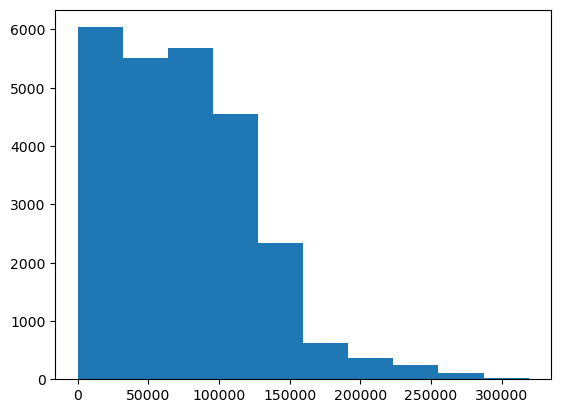

In [67]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

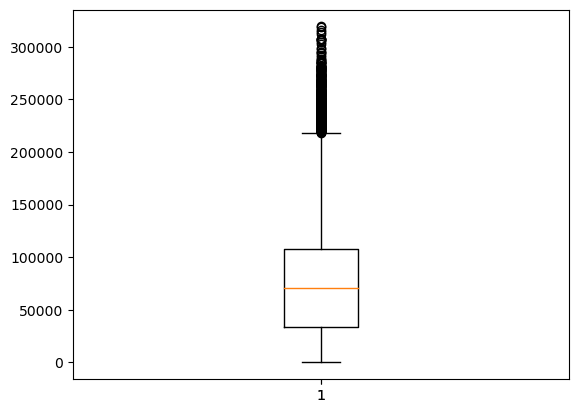

In [31]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

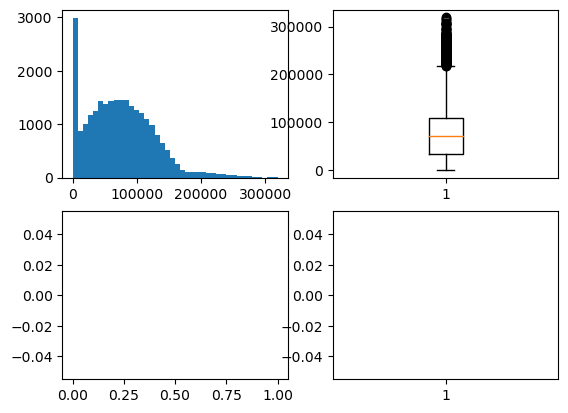

In [39]:

plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()
                       

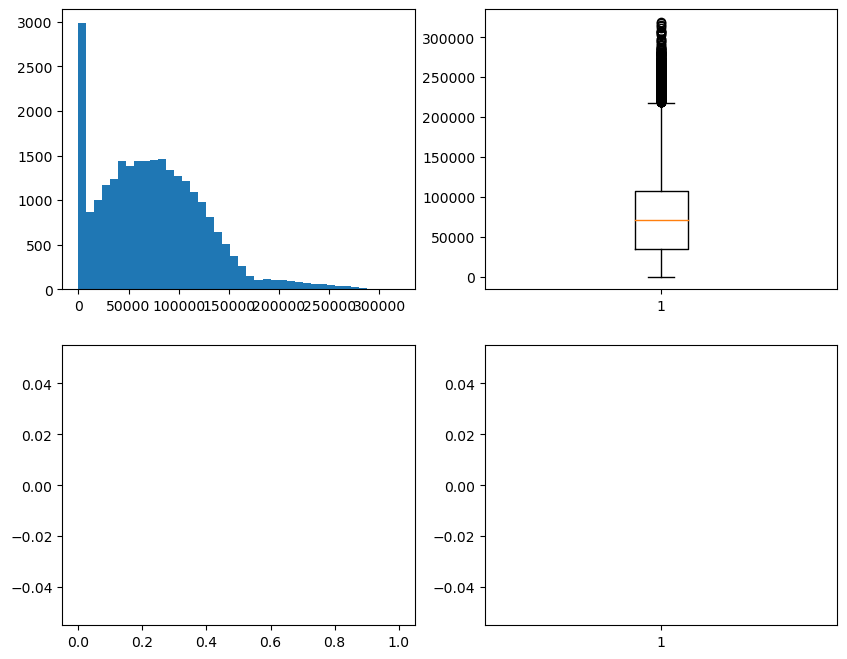

In [42]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.show()
                       

##HOW TO DEAL WITH OUTLIERS

**Drop the outliers**

    - we can drop the outliers if outliers % < 2%
    
    - but this is not recomonded , we lost other colours data also
    
**Impute with median values**

    - as we know the median does not affect by outlilers
    
    - so it is good practice we can impute outliers with median value
    
**cap with q1 or q3 value***

    - if outlilers are present lessthan lower bound then fill with Q1
    
    - if outlilers are more than upper bound then fill with Q3

In [ ]:
#task-3

# read each observation from prevailing wage
# if that observation less than <lb or >ub : fill with median value
# else: keep as it is 


# take empty list=[]
# median=visa_df['p_wage']
# for i in visa_df['p_wage']:
#    if i<lb or i>lb:
#         emptylist.append(median)
#     else:
#         emptylist.append(i)

In [49]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path=r'C:\Users\USER\Naresh IT\filehandling\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [46]:
l=[]
median=visa_df['prevailing_wage']
for i in visa_df['prevailing_wage']:
        if i<lb | i>lb:
             l.append(median)
        else:
            l.append(i)
len(l)

25480

In [58]:
#task-1
lower=[2.136]
upper=[7.98]
upper=[2992]
cols=['lower','upper','frequency']
index=['0']
df=pd.DataFrame(zip(lower,upper,frequency),columns=cols,index=ind)
df

,lower,upper,frequency
lower,2.136,2992,2992
upper,2.136,2992,2992
frequency,2.136,2992,2992


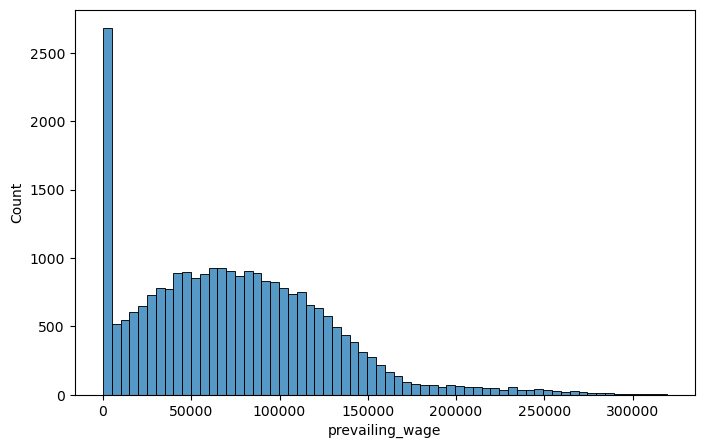

In [61]:
#task=2
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(visa_df['prevailing_wage'])
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path=r'C:\Users\USER\Naresh IT\filehandling\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [8]:

####################################################

median=visa_df['prevailing_wage'].median()
list1=[]
#step-1
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

Q1,Q2,Q3
#step-2
IQR=Q3-Q1
IQR

#STEP-3
lb=Q1-1.5*IQR
ub=Q3-1.5*IQR
lb,ub



for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)
        
visa_df['prevailing_wage_new']=list1

In [9]:

path=r'C:\Users\USER\Naresh IT\filehandling\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


- above replace one we use a traditional approach

- for loop,list,if-else

- the same we can get by using np.where method

In [18]:
dict1={'Name':['A','B','C','D'],
       'Num':[1,2,3,4]}
        
d=pd.DataFrame(dict1)

In [15]:
# i want to replace with 100 num which has >2

# other wise keep same numb

In [19]:
#np.where(con,True,False)
l=np.where(d['Num']>2,100,d['Num'])

d['Num']=l

d

,Name,Num
0,A,1
1,B,2
2,C,100
3,D,100


In [26]:

#step-1
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)


#step-2
IQR=Q3-Q1


#STEP-3
lb=Q1-1.5*IQR
ub=Q3-1.5*IQR




median=visa_df['prevailing_wage'].median()

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
t=median
f=visa_df['prevailing_wage']
visa_df['prevailing_wage']=np.where(con,t,f)


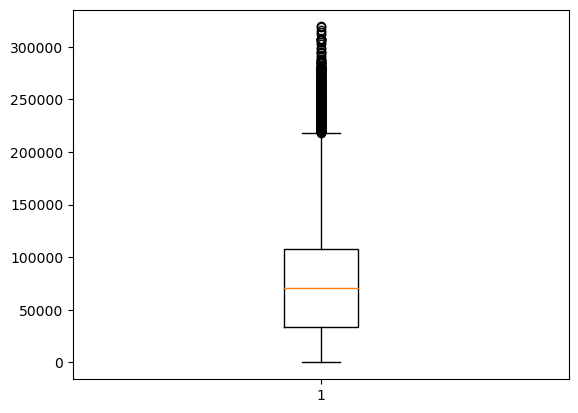

In [25]:

plt.boxplot(visa_df['prevailing_wage'])
plt.show()